В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [92]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

clients_df = pd.read_csv('csv/train.csv')

clients_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.00000,Nwankwo,678.00000,France,Male,29.00000,4.00000,0.00000,3.00000,1.00000,0.00000,180626.36000,0.00000
1,1,15650086.00000,Ch'in,687.00000,France,Female,34.00000,1.00000,0.00000,2.00000,0.00000,1.00000,63736.17000,0.00000
2,2,15733602.00000,Thompson,682.00000,France,Female,52.00000,6.00000,0.00000,3.00000,0.00000,0.00000,179655.87000,1.00000
3,3,15645794.00000,Macleod,753.00000,Germany,Male,44.00000,6.00000,83347.25000,2.00000,1.00000,0.00000,161407.48000,0.00000
4,4,15633840.00000,Hsia,544.00000,Germany,Female,55.00000,0.00000,107747.57000,1.00000,1.00000,0.00000,176580.86000,1.00000


In [93]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


Мені не подобається, що CustomerId - це float, тому я зміню його на int.

In [94]:
# clients_df['CustomerId'] = clients_df['CustomerId'].astype(int)
clients_df.drop(['CustomerId'], axis=1, inplace=True)
clients_df.head()

,id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,Nwankwo,678.00000,France,Male,29.00000,4.00000,0.00000,3.00000,1.00000,0.00000,180626.36000,0.00000
1,1,Ch'in,687.00000,France,Female,34.00000,1.00000,0.00000,2.00000,0.00000,1.00000,63736.17000,0.00000
2,2,Thompson,682.00000,France,Female,52.00000,6.00000,0.00000,3.00000,0.00000,0.00000,179655.87000,1.00000
3,3,Macleod,753.00000,Germany,Male,44.00000,6.00000,83347.25000,2.00000,1.00000,0.00000,161407.48000,0.00000
4,4,Hsia,544.00000,Germany,Female,55.00000,0.00000,107747.57000,1.00000,1.00000,0.00000,176580.86000,1.00000


In [95]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   Surname          15000 non-null  object 
 2   CreditScore      15000 non-null  float64
 3   Geography        15000 non-null  object 
 4   Gender           15000 non-null  object 
 5   Age              15000 non-null  float64
 6   Tenure           15000 non-null  float64
 7   Balance          15000 non-null  float64
 8   NumOfProducts    15000 non-null  float64
 9   HasCrCard        15000 non-null  float64
 10  IsActiveMember   15000 non-null  float64
 11  EstimatedSalary  15000 non-null  float64
 12  Exited           15000 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.5+ MB


In [96]:
use_sample = False

train_val_df, test_df = train_test_split(clients_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(clients_df, test_size=0.25, random_state=42)

In [97]:
print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (11250, 13)
val_df.shape: (3750, 13)
test_df.shape: (3000, 13)


2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [98]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'Exited'

print(input_cols)
print(target_col)

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Exited


3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [99]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

numeric_cols, categorical_cols

(['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Surname', 'Geography', 'Gender'])

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

****Пройдуся по колонкам по порядку.****

Почну з колонки `Surname`

Ця колонка містить прізвища клієнтів.
Підказка від CahtGPT o1 наступна:

Using bank clients’ surnames in a machine learning model is generally not recommended, and in many cases, may be inappropriate or even legally problematic. Here are several considerations:


1. Privacy & Compliance
	•	Personally Identifiable Information (PII): A surname can be considered PII, especially if paired with other attributes (e.g., account details, address). Collecting or using it for modeling could violate privacy regulations (GDPR in the EU, various data protection laws in other regions) unless you have explicit consent and a legally valid reason.
	•	Data Minimization Principle: Many privacy regulations encourage collecting and using only the data that is strictly necessary for the stated purpose. If surnames aren’t strictly necessary, including them can contravene these principles.

2. Potential for Bias & Discrimination
	•	Ethical Risks: A surname can be correlated with ethnicity, religion, or region of origin. This can inadvertently introduce bias into your model. Even if your model’s goal is purely predictive (e.g., credit risk, churn), the presence of sensitive data could lead to discriminatory outcomes.
	•	Regulatory Oversight: In many jurisdictions, using features that might enable direct or proxy discrimination (e.g., race, nationality, religious background) can be subject to strict regulations.

3. Limited Predictive Value
	•	No Strong Signal: In most banking/financial contexts, a surname rarely offers a stable, causal link to a business or risk-related metric. You might see spurious correlations, but these are not robust or ethically valid signals for a model.
	•	Feature Engineering: Typically, data such as account history, transaction patterns, income, credit history, etc., provide more direct and meaningful predictive power. Relying on surnames is rarely beneficial and can degrade the model’s ethical and legal standing.

4. Best Practices & Alternatives
	1.	Remove or Anonymize: In many data pipelines, personally identifiable information—like full names—should be hashed or removed entirely before training.
	2.	Focus on Relevant Attributes: Use demographic or behavioral features that are both lawful to use and predictively relevant (e.g., credit score, transaction frequency).
	3. Compliance Check: Always consult with legal and compliance teams if you’re unsure about using a particular feature to ensure it meets all applicable regulatory requirements.

Summary

While there is no absolute technical barrier to including surnames in a dataset, it is almost always inadvisable for privacy, ethical, and regulatory reasons. If you do incorporate such data, you should carefully consider why it is necessary, confirm it is legally permitted, and account for potential bias that it might introduce. A far safer (and typically more effective) approach is to use non-personal, relevant features that align with both data protection laws and ethical modeling standards.

Я прислухаюсь до поради. Бо на роботі вже не раз стикався з тим, що персональні дані клієнтів не можна ніде зберігати та кому-небудь передавати.

In [100]:
if 'Surname' in train_inputs:
    train_inputs.drop(['Surname'], axis=1, inplace=True)
if 'Surname' in val_inputs:
    val_inputs.drop(['Surname'], axis=1, inplace=True)
if 'Surname' in test_inputs:
    test_inputs.drop(['Surname'], axis=1, inplace=True)
if 'Surname' in categorical_cols:
    categorical_cols.remove('Surname')

print(train_inputs.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11250 entries, 7410 to 7270
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      11250 non-null  float64
 1   Geography        11250 non-null  object 
 2   Gender           11250 non-null  object 
 3   Age              11250 non-null  float64
 4   Tenure           11250 non-null  float64
 5   Balance          11250 non-null  float64
 6   NumOfProducts    11250 non-null  float64
 7   HasCrCard        11250 non-null  float64
 8   IsActiveMember   11250 non-null  float64
 9   EstimatedSalary  11250 non-null  float64
dtypes: float64(8), object(2)
memory usage: 966.8+ KB
None


****Переходимо до колонок `Gender` та `Geography`****

In [101]:
train_inputs['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Є тільки 2 поли: Чоловічий та жіночий

In [102]:
train_inputs['Geography'].unique()

array(['Germany', 'France', 'Spain'], dtype=object)

Як бачимо тут тільки 3 унікальних значення. Тому можемо використати OneHotEncoder

In [103]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_inputs[categorical_cols])

encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [104]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [105]:
encoder.transform(train_inputs[categorical_cols])[:10]

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.]])

In [106]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

# Також приберу оригінальні колонки, щоб вони не заважали навчанню моделі
if 'Geography' in train_inputs:
    train_inputs.drop(['Geography'], axis=1, inplace=True)
if 'Geography' in val_inputs:
    val_inputs.drop(['Geography'], axis=1, inplace=True)
if 'Geography' in test_inputs:
    test_inputs.drop(['Geography'], axis=1, inplace=True)

if 'Gender' in train_inputs:
    train_inputs.drop(['Gender'], axis=1, inplace=True)
if 'Gender' in val_inputs:
    val_inputs.drop(['Gender'], axis=1, inplace=True)
if 'Gender' in test_inputs:
    test_inputs.drop(['Gender'], axis=1, inplace=True)

pd.set_option('display.max_columns', None)
train_inputs

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7410,669.00000,29.00000,6.00000,125961.74000,2.00000,1.00000,0.00000,158887.09000,0.00000,1.00000,0.00000,1.00000,0.00000
10894,818.00000,28.00000,7.00000,0.00000,2.00000,1.00000,0.00000,102908.96000,1.00000,0.00000,0.00000,0.00000,1.00000
1934,591.00000,34.00000,7.00000,0.00000,2.00000,1.00000,1.00000,120852.85000,1.00000,0.00000,0.00000,1.00000,0.00000
11539,554.00000,35.00000,3.00000,0.00000,2.00000,1.00000,1.00000,9984.40000,0.00000,0.00000,1.00000,0.00000,1.00000
2952,663.00000,39.00000,8.00000,0.00000,2.00000,1.00000,0.00000,123982.02000,0.00000,0.00000,1.00000,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,589.00000,29.00000,8.00000,151607.56000,1.00000,1.00000,0.00000,90888.86000,0.00000,0.00000,1.00000,0.00000,1.00000
13418,615.00000,31.00000,5.00000,145973.88000,2.00000,1.00000,1.00000,65612.12000,0.00000,1.00000,0.00000,0.00000,1.00000
5390,703.00000,33.00000,1.00000,116947.76000,2.00000,1.00000,0.00000,134600.94000,0.00000,1.00000,0.00000,1.00000,0.00000
860,597.00000,31.00000,10.00000,123870.07000,1.00000,1.00000,1.00000,161519.77000,1.00000,0.00000,0.00000,0.00000,1.00000


Тепер перейдемо до колонок `CreditScore`, `Ballance` та `EstimatedSalary`

In [107]:
def column_description(column_name):
    print(train_inputs[column_name])

    # Histohram
    plt.hist(train_inputs[column_name], bins=30, edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column_name}')
    plt.show()

    # Density Plot
    sns.kdeplot(data=train_inputs, x=column_name, shade=True)
    plt.title(f'{column_name} Density')
    plt.show()

    # Box plot
    sns.boxplot(data=train_inputs, x=column_name)
    plt.title(f'Box Plot of {column_name}')
    plt.show()


    # Empty values
    credit_null = train_inputs[column_name].isnull()
    counts = credit_null.value_counts()  # how many True, how many False
    counts.plot(kind='bar', color=['orange','green'])
    plt.xticks([0,1], ['Not Null', 'Null'], rotation=0)  # rename ticks for clarity
    plt.title(f'Null vs Not Null for {column_name}')
    plt.ylabel('Count')
    plt.show()

    zero_counts = train_inputs[column_name] == 0
    counts = zero_counts.value_counts()  # how many True, how many False
    counts.plot(kind='bar', color=['orange','green'])
    plt.xticks([0,1], ['Not 0', '0'], rotation=0)  # rename ticks for clarity
    plt.title(f'0 vs Not 0 for {column_name}')
    plt.ylabel('Count')
    plt.show()

7410    669.00000
10894   818.00000
1934    591.00000
11539   554.00000
2952    663.00000
           ...   
5191    589.00000
13418   615.00000
5390    703.00000
860     597.00000
7270    542.00000
Name: CreditScore, Length: 11250, dtype: float64


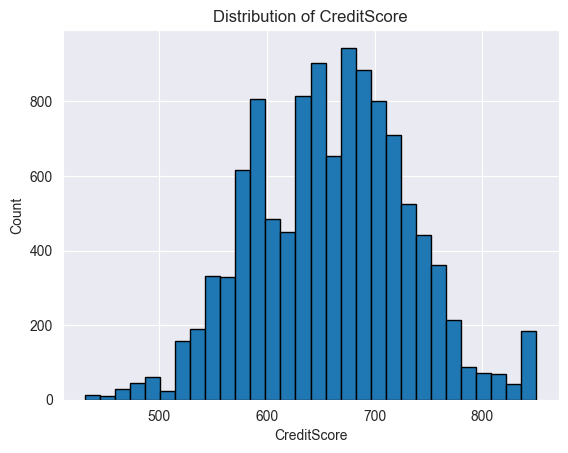

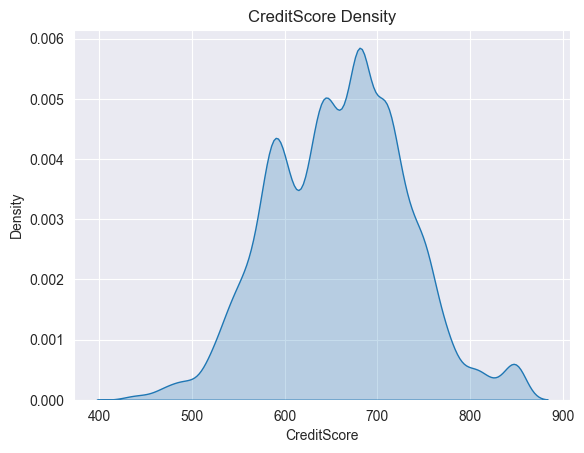

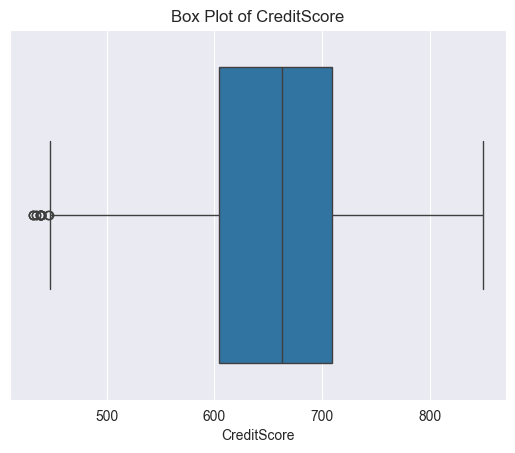

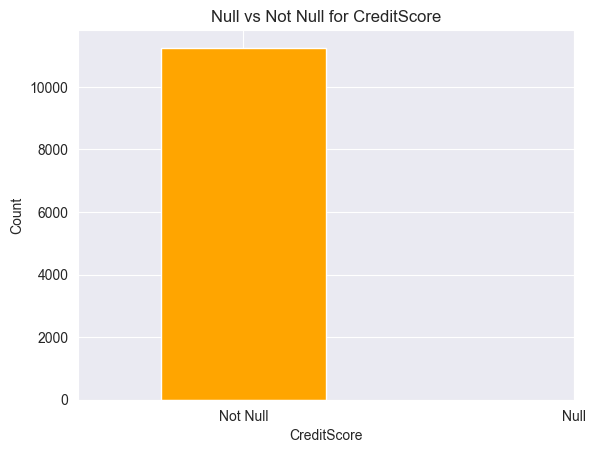

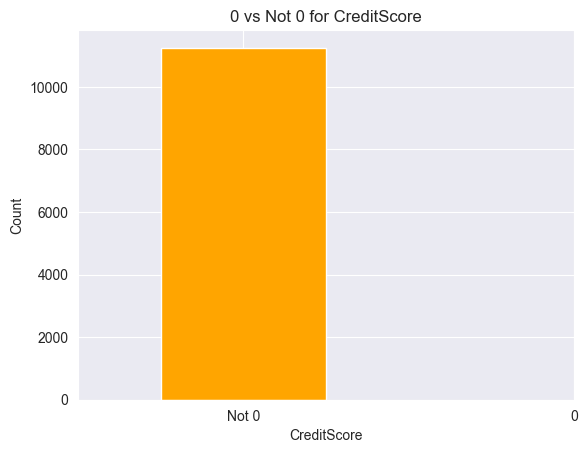

In [108]:
column_description('CreditScore')

Як бачимо, розподіл CreditScore відповідає нормальному з невеликими викидами. Нульових значень немає

Тому можемо виконати скейлінг колонки.

7410    125961.74000
10894        0.00000
1934         0.00000
11539        0.00000
2952         0.00000
            ...     
5191    151607.56000
13418   145973.88000
5390    116947.76000
860     123870.07000
7270         0.00000
Name: Balance, Length: 11250, dtype: float64


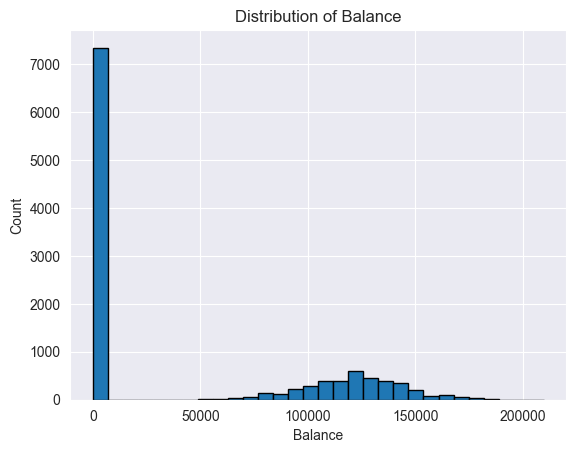

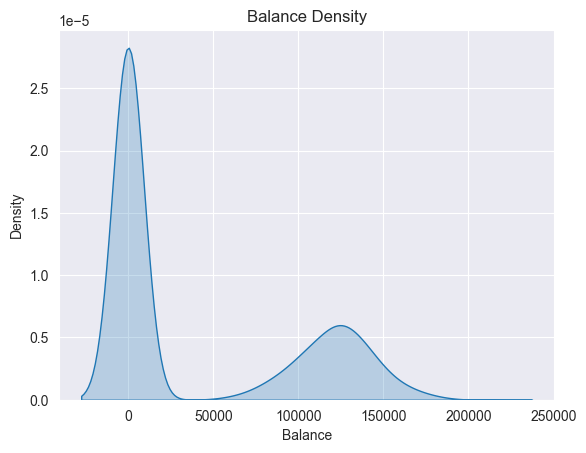

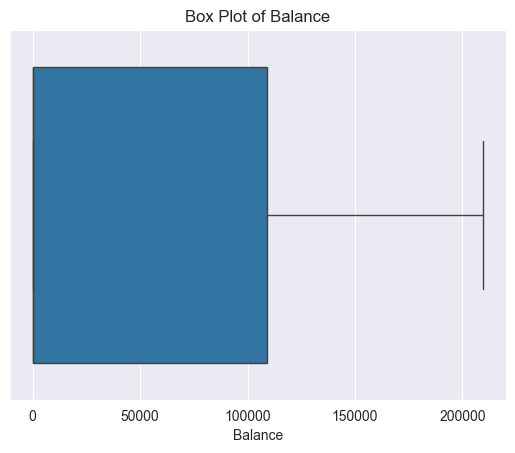

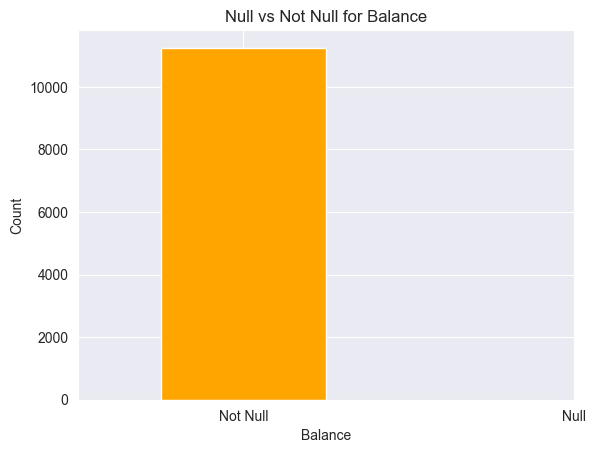

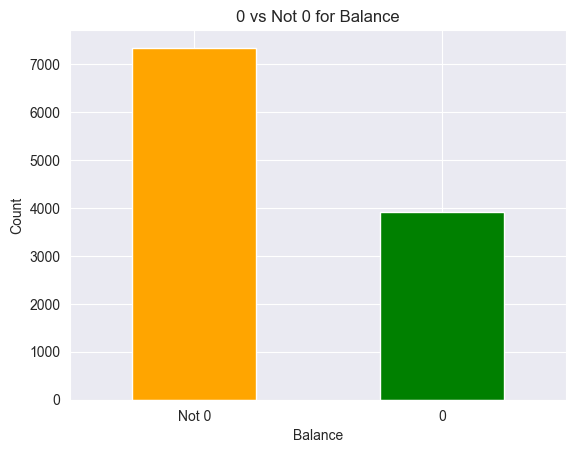

In [109]:
column_description('Balance')

Як бачимо, в колонці `Balance` ми мааємо близько 4000 нульових значень. Це більше половини.

Спочатку я хотів заповнити ці дані чимось, але подивившись матрицю кореляції для заповнених і незаповнених даних, я вирішив залишити їх незаповненими.

In [110]:
# # Помітимо колонки які від початку були пустими
# train_inputs['BalanceWasZero'] = (train_inputs['Balance'] == 0).astype(int)
# train_inputs['Balance'] =  train_inputs['Balance'].replace(0, np.nan)
# # Заповнення пустих значень для колонки 'Balance'
#
# # 1. Create the imputer
# imputer = SimpleImputer(strategy='mean')
#
# # 2. Fit on the training data only (to learn the mean)
# imputer.fit(train_inputs[['Balance']])
#
# # 3. Transform the training data
# train_inputs['Balance'] = imputer.transform(train_inputs[['Balance']])
#
# # 4. Transform validation data with the same learned mean
# val_inputs['Balance'] = imputer.transform(val_inputs[['Balance']])
#
# # 5. Transform test data with the same learned mean
# test_inputs['Balance'] = imputer.transform(test_inputs[['Balance']])
#
# column_description('Balance')

7410    158887.09000
10894   102908.96000
1934    120852.85000
11539     9984.40000
2952    123982.02000
            ...     
5191     90888.86000
13418    65612.12000
5390    134600.94000
860     161519.77000
7270    169915.02000
Name: EstimatedSalary, Length: 11250, dtype: float64


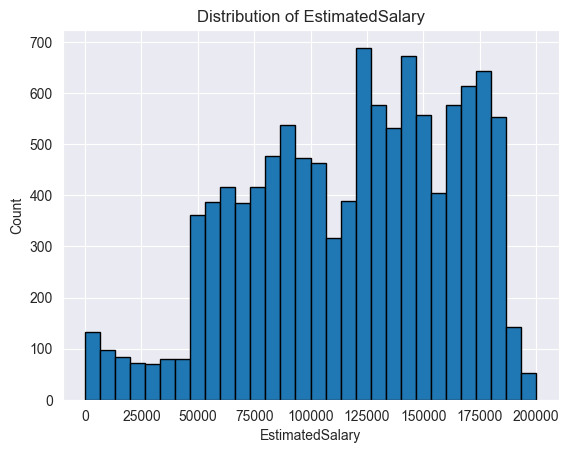

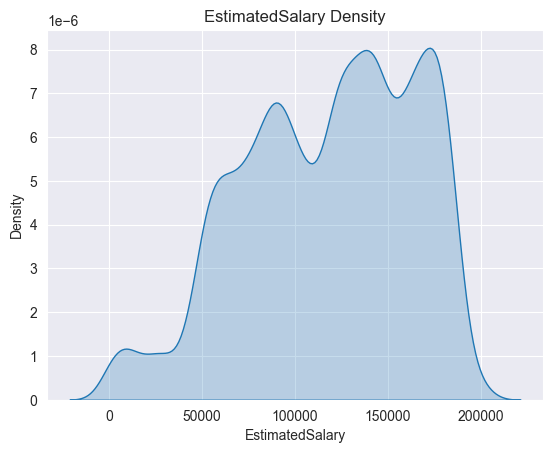

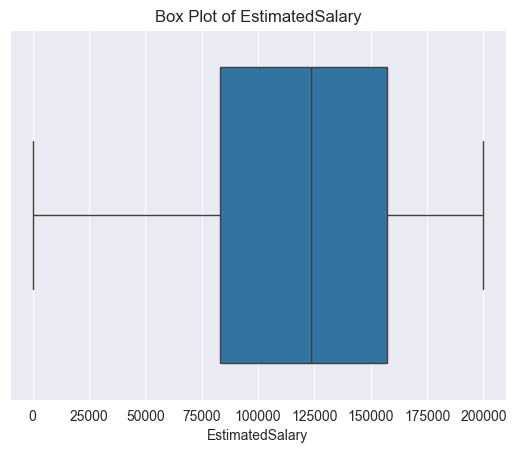

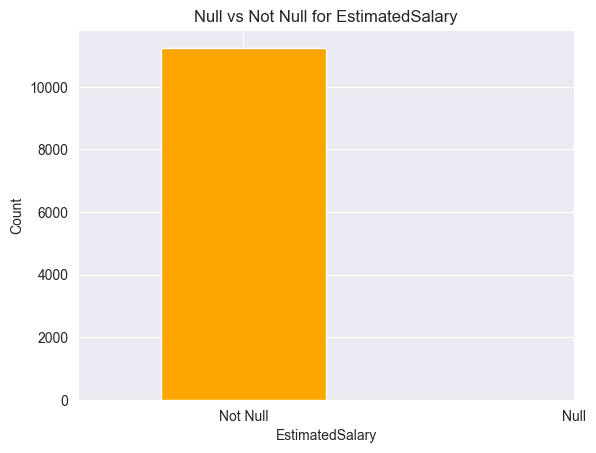

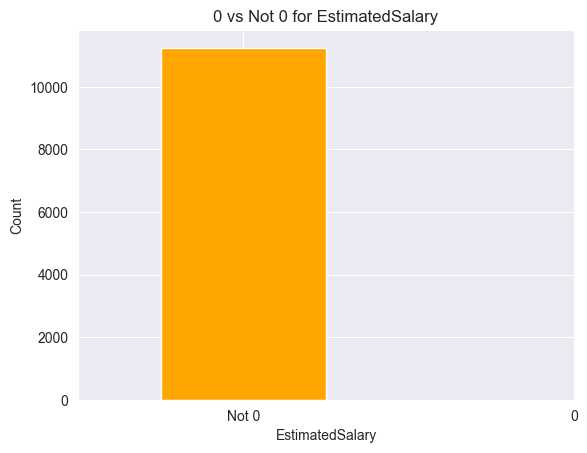

In [111]:
column_description('EstimatedSalary')

У колонці `EstimatedSalary` нульових і пустих значень немає і тому можна проводити масштабування.

Таким чином ми позбавилися нулів в колонці `Balance`

****Давайте подивимося на клонки, які залишилися: `Age`, `Tenure`, `NumOfProducts`, `HasCrCard`****

7410    29.00000
10894   28.00000
1934    34.00000
11539   35.00000
2952    39.00000
          ...   
5191    29.00000
13418   31.00000
5390    33.00000
860     31.00000
7270    41.00000
Name: Age, Length: 11250, dtype: float64


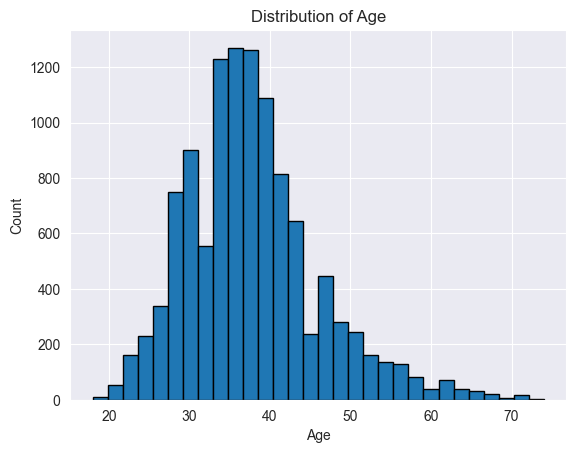

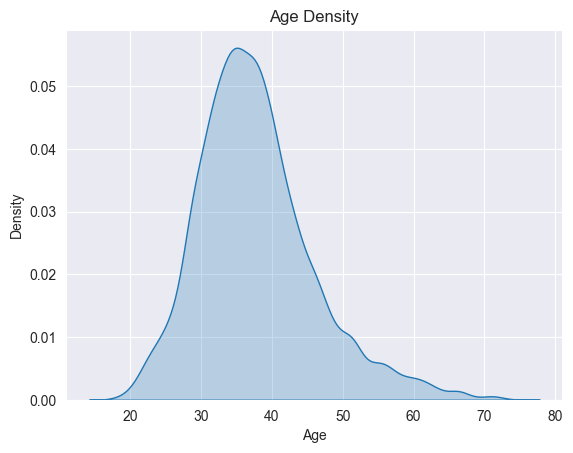

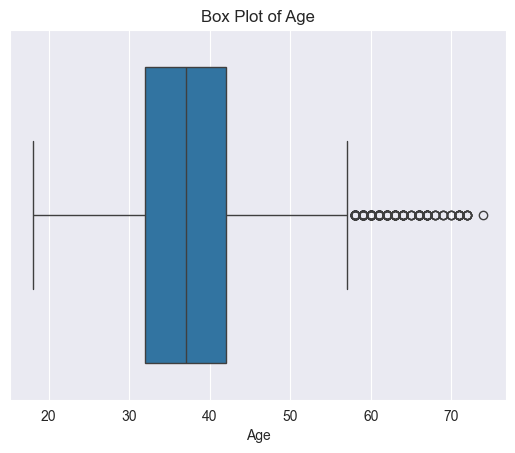

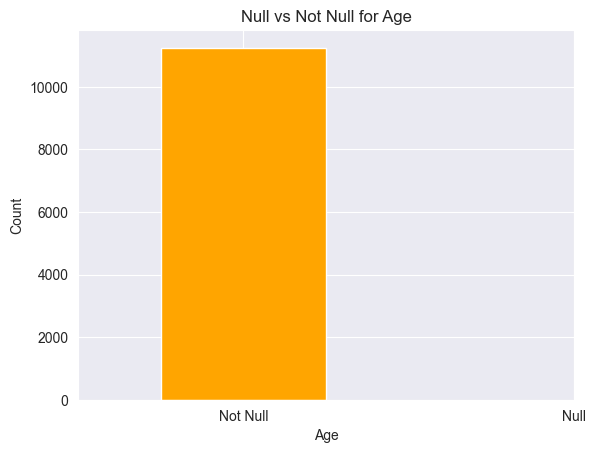

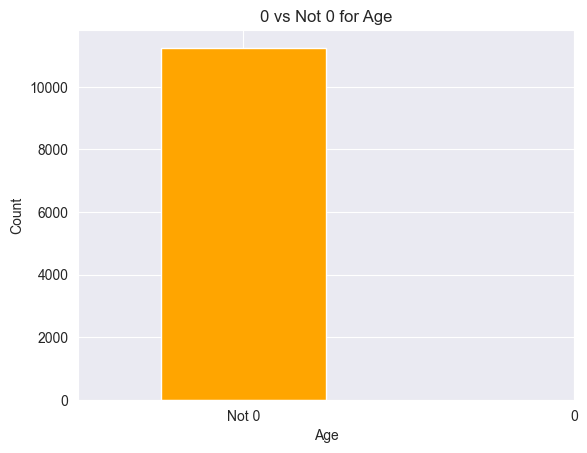

In [112]:
column_description('Age')

Дивно, що колонка `Age` містить дані у форматі `float`. Давайте позбавимося цього.

In [113]:
# train_inputs['Age'] = train_inputs['Age'].astype(int)
# val_inputs['Age'] = val_inputs['Age'].astype(int)
# test_inputs['Age'] = test_inputs['Age'].astype(int)

train_inputs.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7410,669.00000,29.00000,6.00000,125961.74000,2.00000,1.00000,0.00000,158887.09000,0.00000,1.00000,0.00000,1.00000,0.00000
10894,818.00000,28.00000,7.00000,0.00000,2.00000,1.00000,0.00000,102908.96000,1.00000,0.00000,0.00000,0.00000,1.00000
1934,591.00000,34.00000,7.00000,0.00000,2.00000,1.00000,1.00000,120852.85000,1.00000,0.00000,0.00000,1.00000,0.00000
11539,554.00000,35.00000,3.00000,0.00000,2.00000,1.00000,1.00000,9984.40000,0.00000,0.00000,1.00000,0.00000,1.00000
2952,663.00000,39.00000,8.00000,0.00000,2.00000,1.00000,0.00000,123982.02000,0.00000,0.00000,1.00000,0.00000,1.00000


Подивимося на колонку `Tenure`

7410     6.00000
10894    7.00000
1934     7.00000
11539    3.00000
2952     8.00000
          ...   
5191     8.00000
13418    5.00000
5390     1.00000
860     10.00000
7270     5.00000
Name: Tenure, Length: 11250, dtype: float64


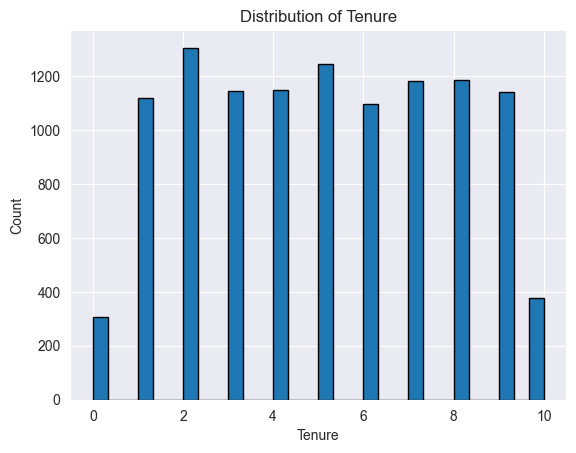

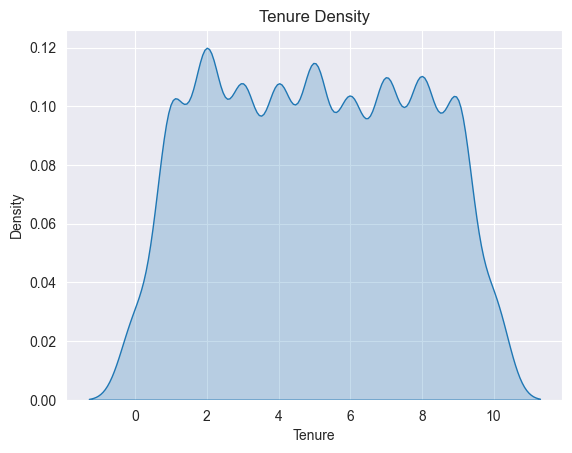

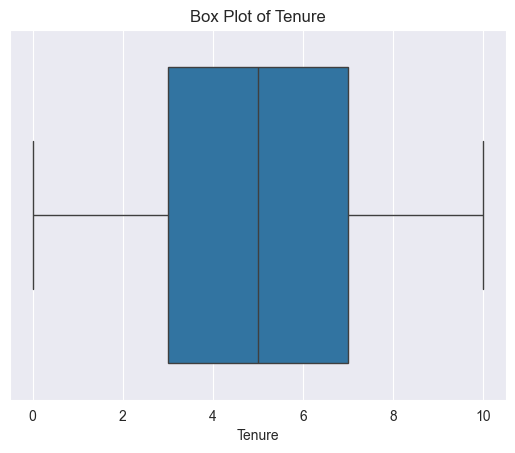

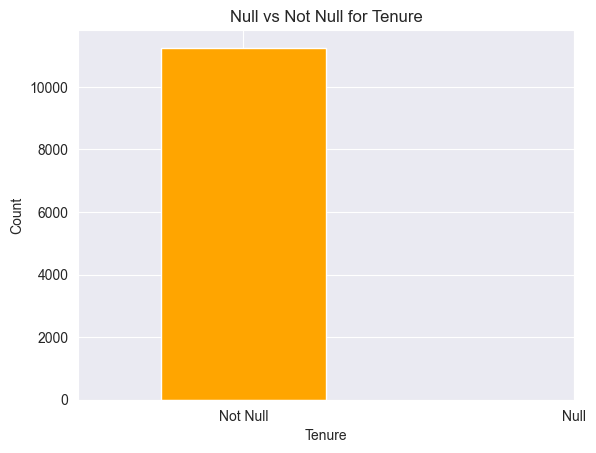

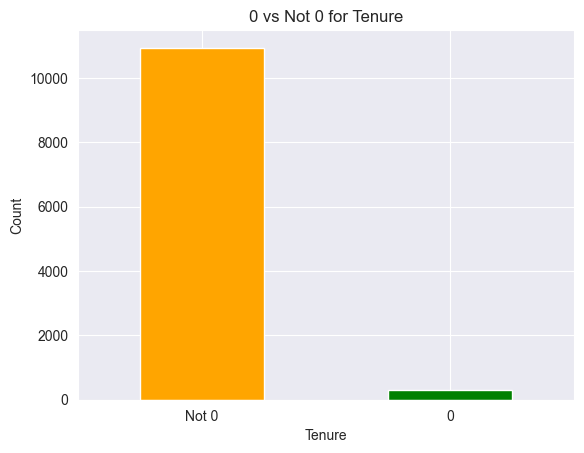

In [114]:
column_description('Tenure')

Є трохи нулів, але їх можна не чіпати, бо можуть бути клієнти, які обслуговуються менше року.

Єдине, що хочеться зробити - привести дані до типу int.

In [115]:
# train_inputs['Tenure'] = train_inputs['Tenure'].astype(int)
# val_inputs['Tenure'] = val_inputs['Tenure'].astype(int)
# test_inputs['Tenure'] = test_inputs['Tenure'].astype(int)

train_inputs['Tenure'].head()

7410    6.00000
10894   7.00000
1934    7.00000
11539   3.00000
2952    8.00000
Name: Tenure, dtype: float64

Поглянемо на колонку `NumOfProducts`

7410    2.00000
10894   2.00000
1934    2.00000
11539   2.00000
2952    2.00000
          ...  
5191    1.00000
13418   2.00000
5390    2.00000
860     1.00000
7270    1.00000
Name: NumOfProducts, Length: 11250, dtype: float64


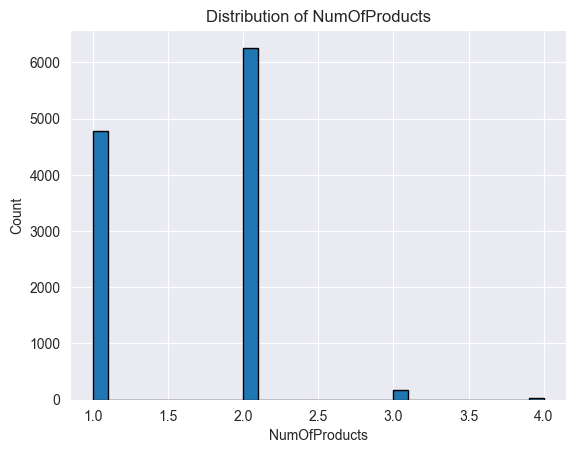

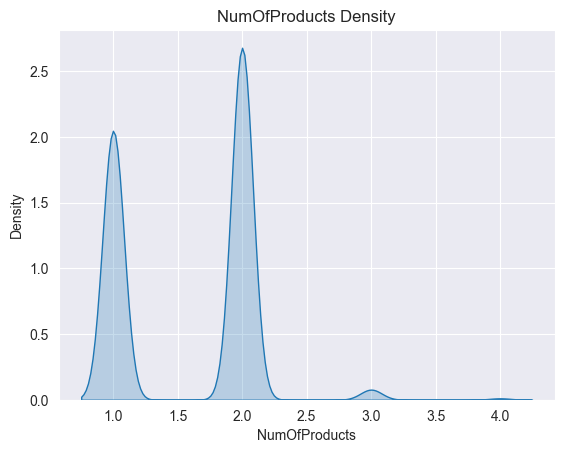

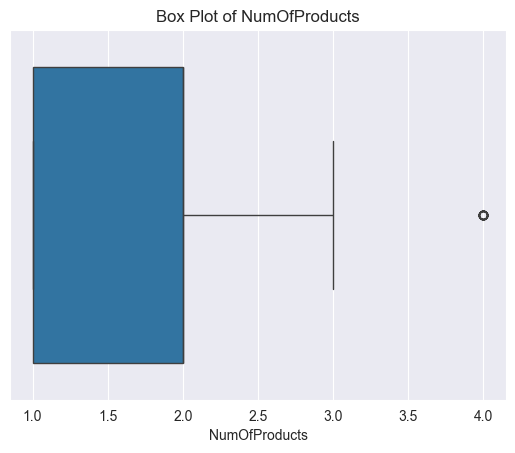

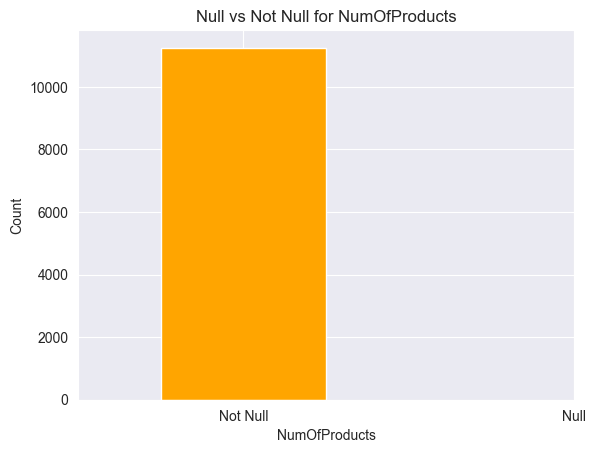

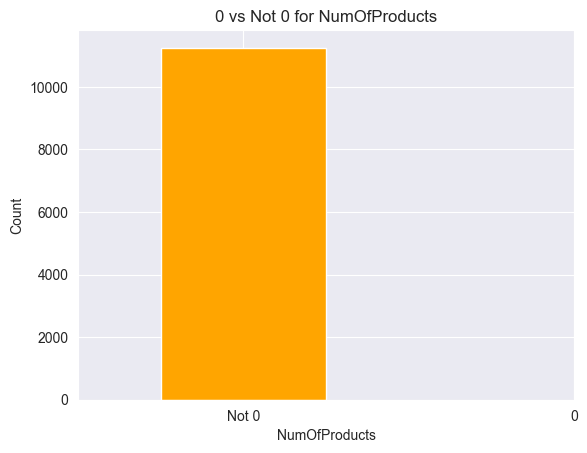

In [116]:
column_description('NumOfProducts')

Тут теж можна зробити тип даних int:

In [117]:
# train_inputs['NumOfProducts'] = train_inputs['NumOfProducts'].astype(int)
# val_inputs['NumOfProducts'] = val_inputs['NumOfProducts'].astype(int)
# test_inputs['NumOfProducts'] = test_inputs['NumOfProducts'].astype(int)

train_inputs['NumOfProducts'].head()

7410    2.00000
10894   2.00000
1934    2.00000
11539   2.00000
2952    2.00000
Name: NumOfProducts, dtype: float64

Остання колонка - `HasCrCard`. Думаю тут одразу зрозуміло, що треба робити int

7410    1.00000
10894   1.00000
1934    1.00000
11539   1.00000
2952    1.00000
          ...  
5191    1.00000
13418   1.00000
5390    1.00000
860     1.00000
7270    1.00000
Name: HasCrCard, Length: 11250, dtype: float64


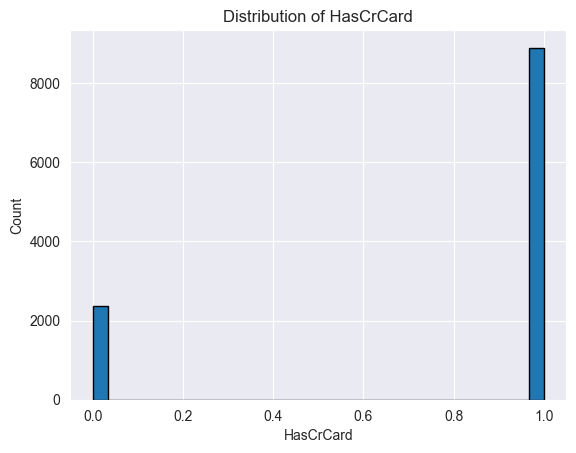

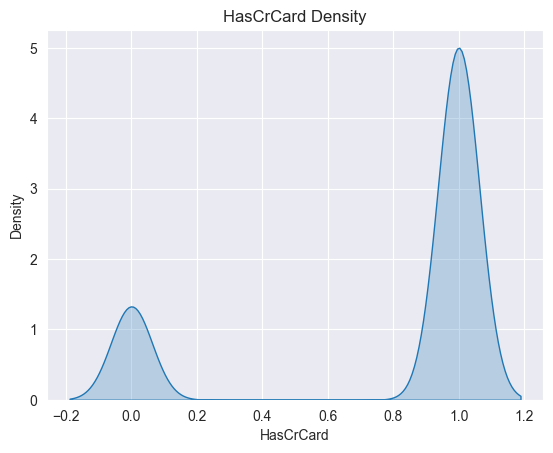

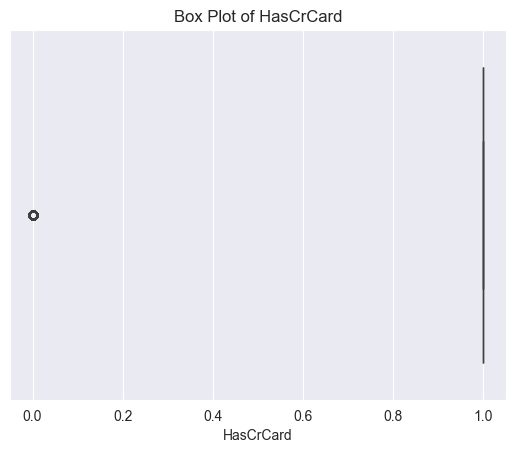

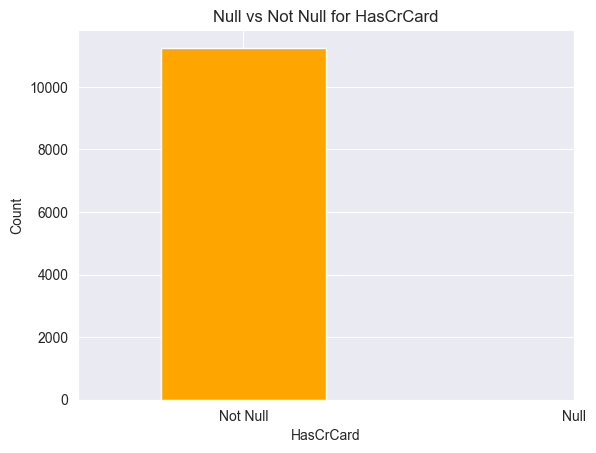

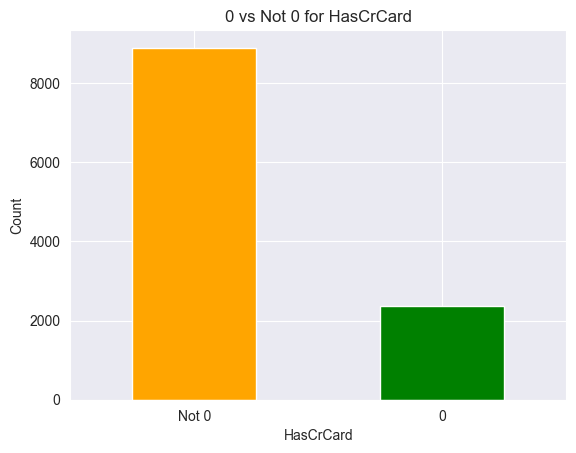

In [118]:
# train_inputs['HasCrCard'] = train_inputs['HasCrCard'].astype(int)
# val_inputs['HasCrCard'] = val_inputs['HasCrCard'].astype(int)
# test_inputs['HasCrCard'] = test_inputs['HasCrCard'].astype(int)

column_description('HasCrCard')

Кредитної картки немає у 2000 людей з вибірки.

Тепер давайте проскейлимо дані:

In [119]:
scaler = MinMaxScaler()

scaler.fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.00000,11250.00000,11250.00000,11250.00000,11250.00000,11250.00000,11250.00000,11250.00000
mean,0.55000,0.35000,0.50000,0.20000,0.20000,0.79000,0.49000,0.59000
std,0.17000,0.15000,0.28000,0.28000,0.18000,0.41000,0.50000,0.23000
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.41000,0.25000,0.30000,0.00000,0.00000,1.00000,0.00000,0.42000
50%,0.55000,0.34000,0.50000,0.00000,0.33000,1.00000,0.00000,0.62000
75%,0.66000,0.43000,0.70000,0.52000,0.33000,1.00000,1.00000,0.79000
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [120]:
train_inputs.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7410,0.56802,0.19643,0.60000,0.60048,0.33333,1.00000,0.00000,0.79445,0.00000,1.00000,0.00000,1.00000,0.00000
10894,0.92363,0.17857,0.70000,0.00000,0.33333,1.00000,0.00000,0.51454,1.00000,0.00000,0.00000,0.00000,1.00000
1934,0.38186,0.28571,0.70000,0.00000,0.33333,1.00000,1.00000,0.60426,1.00000,0.00000,0.00000,1.00000,0.00000
11539,0.29356,0.30357,0.30000,0.00000,0.33333,1.00000,1.00000,0.04987,0.00000,0.00000,1.00000,0.00000,1.00000
2952,0.55370,0.37500,0.80000,0.00000,0.33333,1.00000,0.00000,0.61991,0.00000,0.00000,1.00000,0.00000,1.00000


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [121]:
# %pip install pyarrow
# %pip install fastparquet

In [122]:
%time
train_inputs.to_parquet('parquet/train_inputs.parquet')
val_inputs.to_parquet('parquet/val_inputs.parquet')
test_inputs.to_parquet('parquet/test_inputs.parquet')

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs


In [123]:
os.listdir('./parquet')

['test_inputs.parquet', 'train_inputs.parquet', 'val_inputs.parquet']

6. З підготовлених вхідних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [124]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7410,0.56802,0.19643,0.60000,0.60048,0.33333,1.00000,0.00000,0.79445,0.00000,1.00000,0.00000,1.00000,0.00000
10894,0.92363,0.17857,0.70000,0.00000,0.33333,1.00000,0.00000,0.51454,1.00000,0.00000,0.00000,0.00000,1.00000
1934,0.38186,0.28571,0.70000,0.00000,0.33333,1.00000,1.00000,0.60426,1.00000,0.00000,0.00000,1.00000,0.00000
11539,0.29356,0.30357,0.30000,0.00000,0.33333,1.00000,1.00000,0.04987,0.00000,0.00000,1.00000,0.00000,1.00000
2952,0.55370,0.37500,0.80000,0.00000,0.33333,1.00000,0.00000,0.61991,0.00000,0.00000,1.00000,0.00000,1.00000


7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

<Axes: >

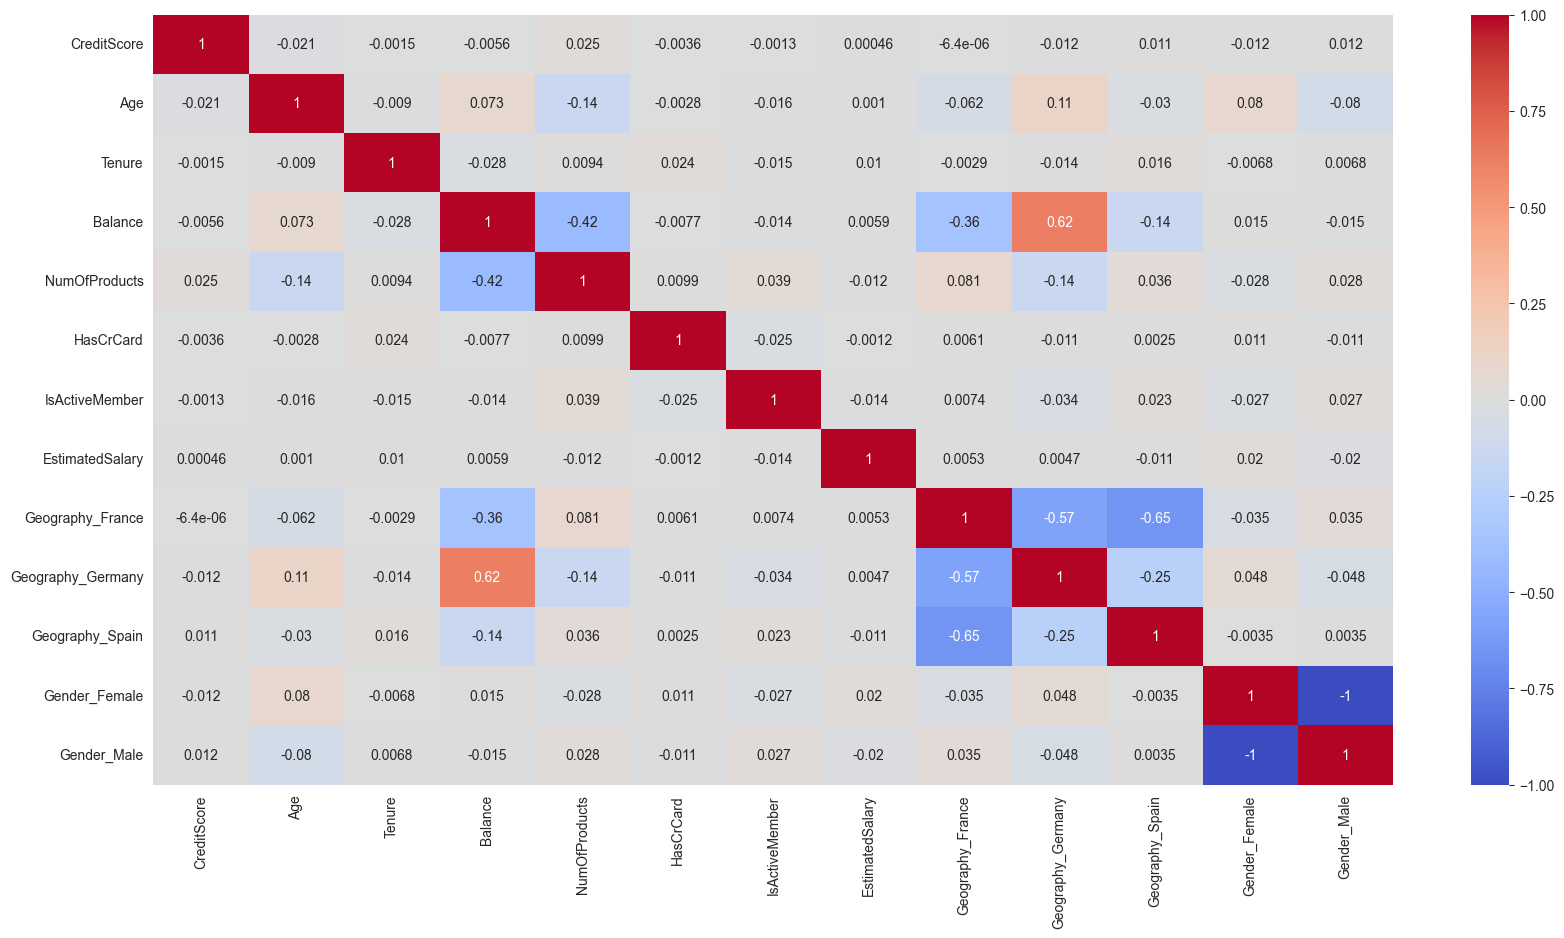

In [125]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True,cmap="coolwarm")

<Axes: >

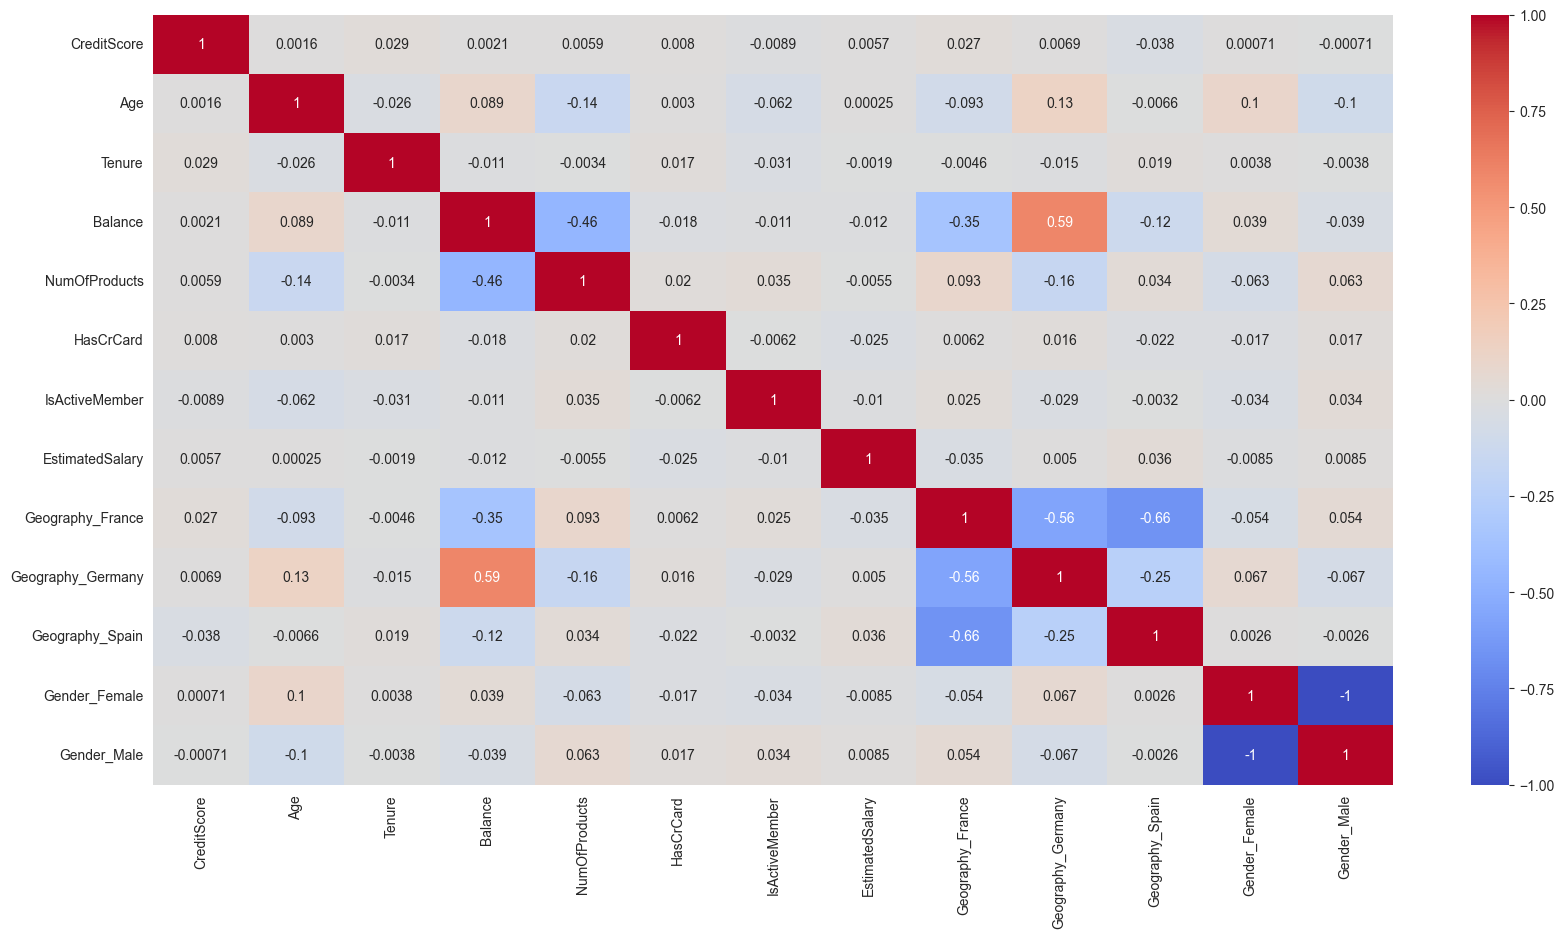

In [126]:
plt.figure(figsize=(20,10))
sns.heatmap(X_val.corr(),annot=True,cmap="coolwarm")

In [127]:
from sklearn.metrics import f1_score

In [128]:
preds = model.predict(X_train)
preds[:5], train_targets[:5]

(array([0., 0., 0., 0., 0.]),
 7410    0.00000
 10894   0.00000
 1934    0.00000
 11539   0.00000
 2952    0.00000
 Name: Exited, dtype: float64)

In [129]:
f1_score(train_targets, preds, pos_label=1)

0.6237234878240377

In [130]:
def get_f1_score(inputs, targets, name=''):
  preds = model.predict(inputs)

  f1_score_ = f1_score(targets, preds, pos_label=1)
  print(f"F1 score {name}: {f1_score_:.2f}%")

get_f1_score(X_train, train_targets, 'Training')
get_f1_score(X_val, val_targets, 'Validation')
get_f1_score(X_test, test_targets, 'Test')

F1 score Training: 0.62%
F1 score Validation: 0.63%
F1 score Test: 0.64%


In [131]:
from sklearn.metrics import roc_curve, auc

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Training: 0.88


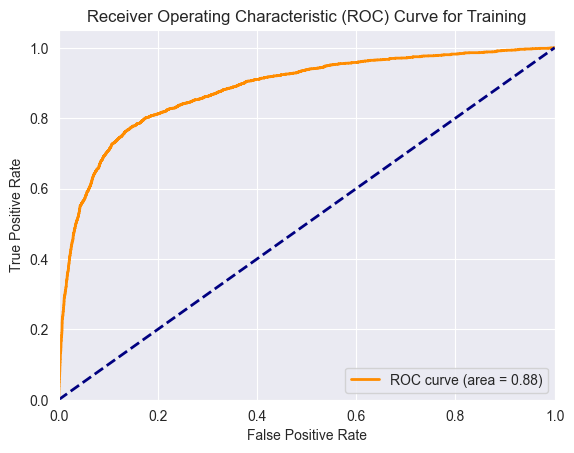

AUROC for Validation: 0.88


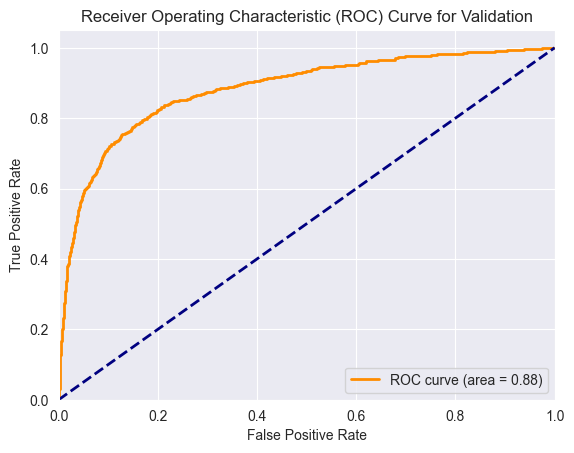

In [132]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

AUROC для тренувальних і тестових даних становить 0.88, що є добре.

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [133]:
train_df['Exited'].value_counts()

Exited
0.00000    8984
1.00000    2266
Name: count, dtype: int64

In [134]:
majority_class = 0

train_preds_major = np.full(len(X_train), fill_value=majority_class)
val_preds_major = np.full(len(X_val), fill_value=majority_class)

In [135]:

train_preds = model.predict(X_train)
train_preds

array([0., 0., 0., ..., 0., 0., 1.])

In [136]:
train_targets

7410    0.00000
10894   0.00000
1934    0.00000
11539   0.00000
2952    0.00000
          ...  
5191    0.00000
13418   0.00000
5390    0.00000
860     0.00000
7270    0.00000
Name: Exited, Length: 11250, dtype: float64

In [137]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.87070722, 0.12929278],
       [0.98389311, 0.01610689],
       [0.96679706, 0.03320294],
       ...,
       [0.77922396, 0.22077604],
       [0.98134585, 0.01865415],
       [0.40140055, 0.59859945]])

In [138]:
np.argmax(train_probs, axis=1)

array([0, 0, 0, ..., 0, 0, 1])

(array([5962., 1804.,  893.,  562.,  462.,  363.,  288.,  310.,  348.,
         258.]),
 array([0.00142992, 0.10037408, 0.19931824, 0.2982624 , 0.39720657,
        0.49615073, 0.59509489, 0.69403905, 0.79298321, 0.89192737,
        0.99087153]),
 <BarContainer object of 10 artists>)

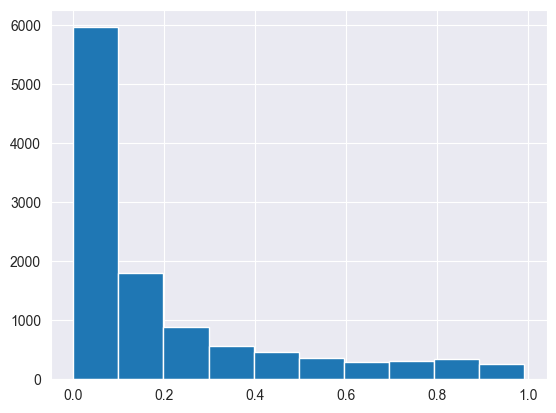

In [139]:
plt.hist(train_probs[:,1])

In [140]:
(train_probs[:,1][:20]>0.2).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [141]:
(train_probs[:,1][:20]>0.5).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [142]:
train_probs[:,1].round(2)[:20]

array([0.13, 0.02, 0.03, 0.02, 0.09, 0.02, 0.06, 0.08, 0.02, 0.83, 0.16,
       0.  , 0.06, 0.84, 0.03, 0.97, 0.46, 0.36, 0.04, 0.23])

In [143]:
train_targets.value_counts(normalize=True)

Exited
0.00000   0.79858
1.00000   0.20142
Name: proportion, dtype: float64

In [144]:
model.classes_

array([0., 1.])

In [145]:
from sklearn.metrics import accuracy_score

In [146]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

acc_train_model = accuracy_score(train_targets, train_preds)
acc_val_model = accuracy_score(val_targets, val_preds)

print("Accuracy (Train) for trained model:", acc_train_model)
print("Accuracy (Validation) for trained model:", acc_val_model)

acc_train_major = accuracy_score(train_targets, train_preds_major)
acc_val_major = accuracy_score(val_targets, val_preds_major)

print("Accuracy (Train) for majority-class 0 model:", acc_train_major)
print("Accuracy (Validation) for majority-class 0 model:", acc_val_major)


Accuracy (Train) for trained model: 0.8722666666666666
Accuracy (Validation) for trained model: 0.8706666666666667
Accuracy (Train) for majority-class 0 model: 0.7985777777777778
Accuracy (Validation) for majority-class 0 model: 0.7904


In [147]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets, train_preds)

array([[8622,  362],
       [1075, 1191]])

In [148]:
confusion_matrix(train_targets, train_preds_major)

array([[8984,    0],
       [2266,    0]])

In [149]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return preds

Accuracy: 87.23%


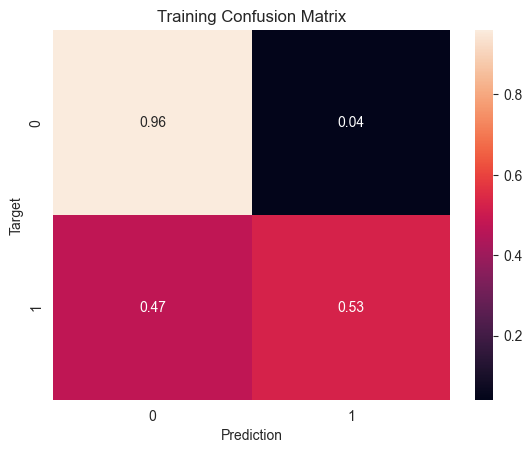

In [150]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 87.07%


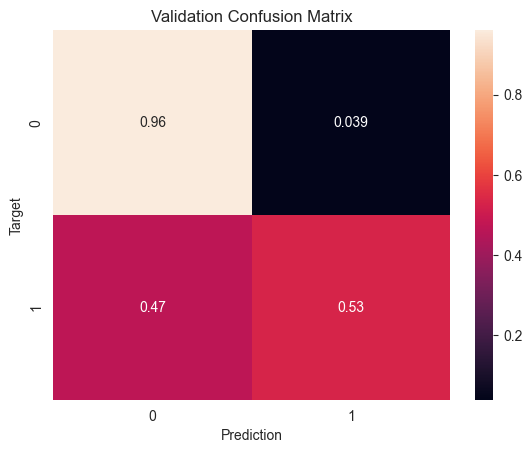

In [151]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 87.27%


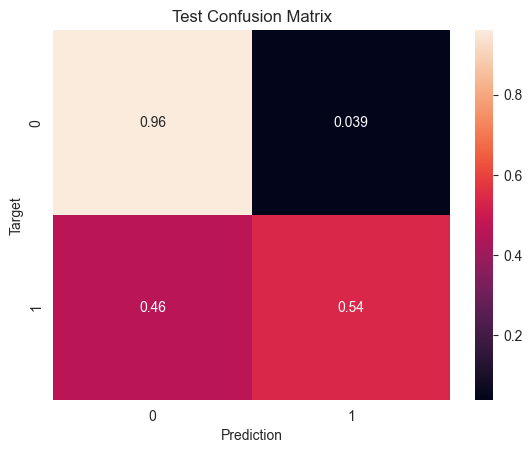

In [152]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [153]:
def random_guess(inputs):
    return np.random.choice([0, 1], len(inputs))
def all_no(inputs):
    return np.full(len(inputs), 0)

In [154]:
accuracy_score(test_targets, random_guess(X_test))

0.48933333333333334

In [155]:
accuracy_score(test_targets, all_no(X_test))

0.7903333333333333

Модель має точність 87.27%, тому можна вважати її хорошою.

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [156]:
import joblib

churn_prediction = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols,
}

joblib.dump(churn_prediction, 'models/churn_prediction.joblib')

model_2 = joblib.load('models/churn_prediction.joblib')

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [193]:

# Намагався використати цю функцію, щоб підібрати найкращий threshhold для моєї функції, але з цим перебдбачення виявилося ще гіршим - 0.7, то я її поки прибрав.
def best_threshold(inputs):
    best_thresh = 0.0
    best_f1 = 0.0

    probas = model.predict_proba(X_val)[:, 1]

    for thresh in [i * 0.01 for i in range(0, 101)]:  # from 0.00 to 1.00 step 0.01
        pred_labels = (probas >= thresh).astype(int)
        score = f1_score(val_targets, pred_labels)
        if score > best_f1:
            best_f1 = score
            best_thresh = thresh

    print("Best threshold =", best_thresh)
    print("Best F1 =", best_f1)
    return best_thresh

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, best_thresh, input_df: pd.DataFrame):
    # input_df['Age'] = input_df['Age'].astype(int)
    # input_df['Tenure'] = input_df['Tenure'].astype(int)
    # input_df['NumOfProducts'] = input_df['NumOfProducts'].astype(int)
    # input_df['HasCrCard'] = input_df['HasCrCard'].astype(int)

    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])


    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])

    if 'Surname' in input_df:
        input_df.drop(['Surname'], axis=1, inplace=True)
    if 'Surname' in categorical_cols:
        categorical_cols.remove('Surname')

    if 'Geography' in input_df:
        input_df.drop(['Geography'], axis=1, inplace=True)

    if 'Gender' in input_df:
        input_df.drop(['Gender'], axis=1, inplace=True)

    X_input = input_df[numeric_cols + encoded_cols]

    prob = model.predict_proba(X_input)
    threshhold_prob = (prob >= 0.5).astype(int)
    return threshhold_prob

In [158]:
# predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [191]:
test_raw_df = pd.read_csv('csv/test.csv')

best_thresh = best_threshold(test_raw_df)
predictions = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, best_thresh, test_raw_df)
exited_predictions = np.argmax(predictions, axis=1)
test_raw_df['Exited'] = exited_predictions


Best threshold = 0.34
Best F1 = 0.684472049689441


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [192]:
sample_submission_df = pd.read_csv('csv/sample_submission.csv')

best_thresh = best_threshold(test_raw_df)
merged_df = sample_submission_df.merge(
    test_raw_df[['id', 'Exited']],
    on='id',
    how='left'
)

# Remove 'Exited_x' and rename 'Exited_y' => 'Exited'
merged_df = merged_df.drop(columns=['Exited_x'])
merged_df = merged_df.rename(columns={'Exited_y': 'Exited'})

merged_df.to_csv('csv/submission.csv', index=False)

merged_df


# merged_df['Exited'] = merged_df['prediction']
# merged_df = merged_df.drop(columns=['prediction'])

Best threshold = 0.34
Best F1 = 0.684472049689441


,id,Exited
0,15000,0
1,15001,0
2,15002,0
3,15003,0
4,15004,0
...,...,...
9995,24995,0
9996,24996,0
9997,24997,0
9998,24998,0
